<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering


----


Install the below libraries


In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab



In [ ]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [ ]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


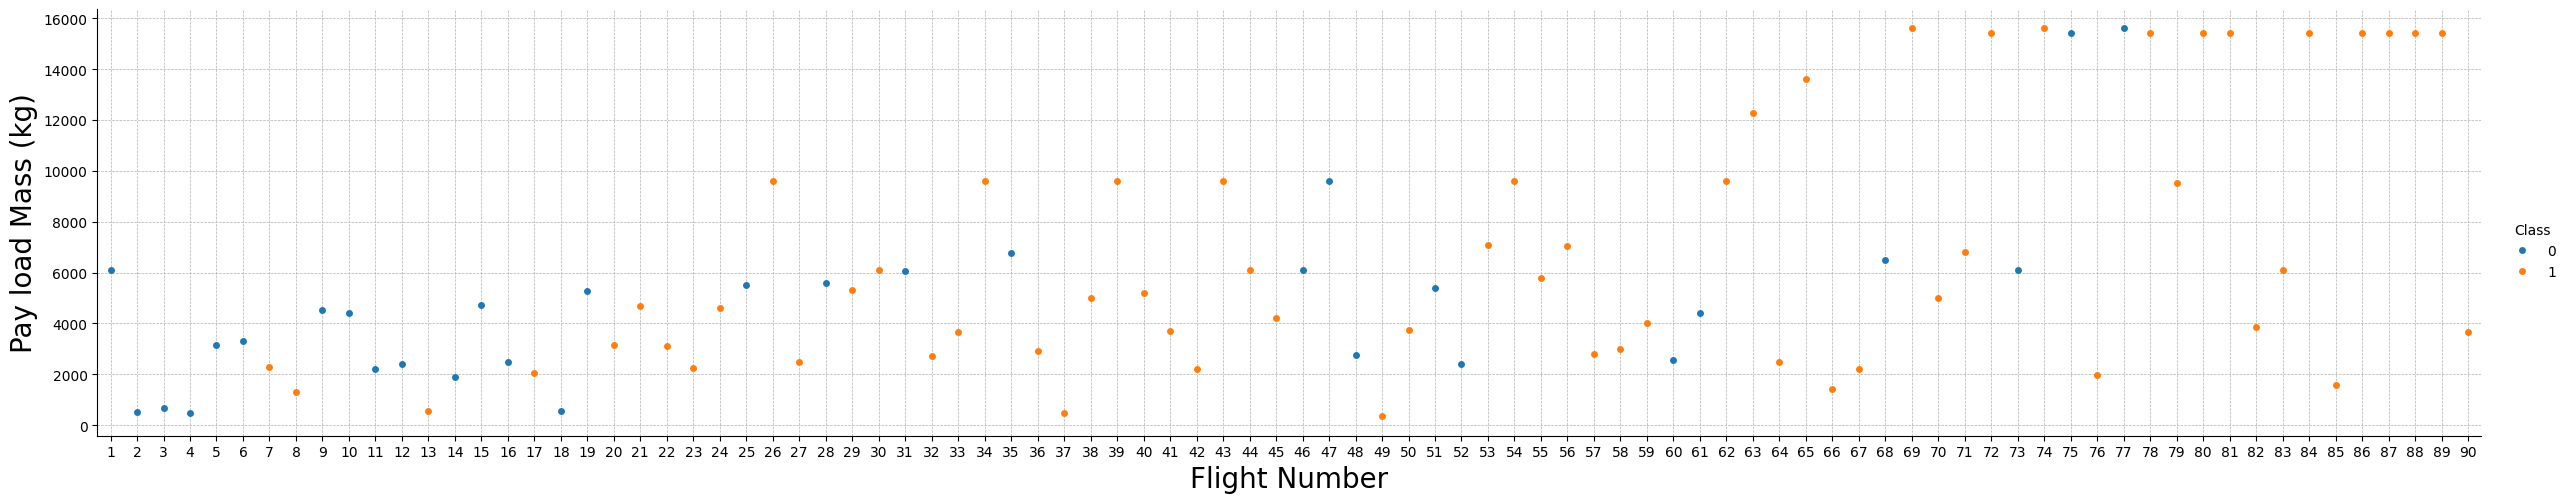

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


In [ ]:
df_launch_site = df.groupby('LaunchSite')['Class'].mean().reset_index()
df_launch_site

,LaunchSite,Class
0,CCAFS SLC 40,0.600000
1,KSC LC 39A,0.772727
2,VAFB SLC 4E,0.769231


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


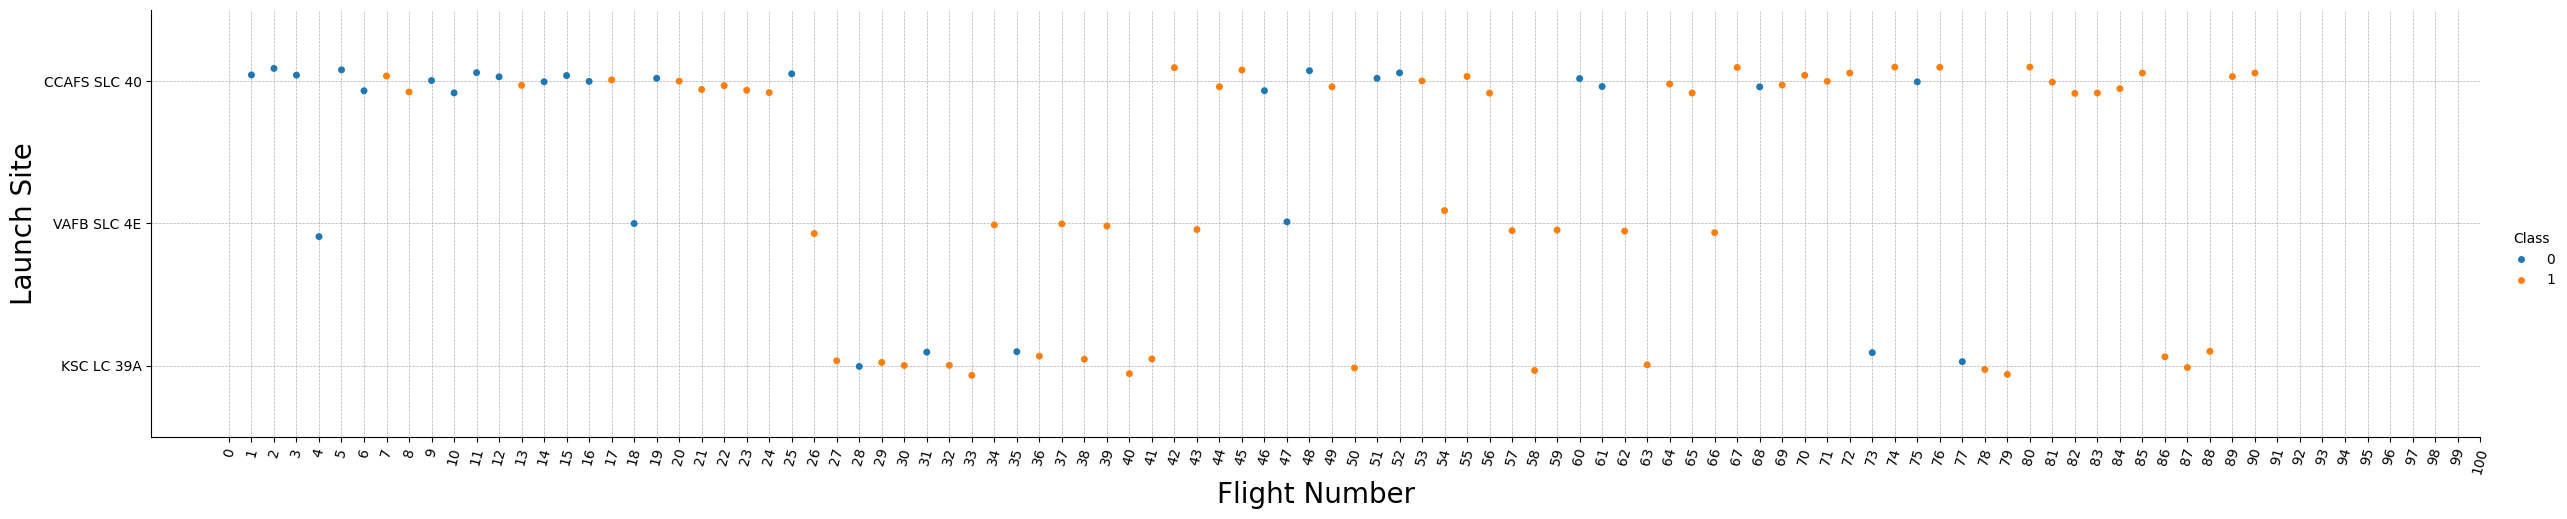

In [ ]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=np.arange(0, 101, 1), rotation = 75)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Key Observations

KSC LS-39A:
   - Has the hightst success rate and it is the second most frequently used launch site.

CCAFS SLC-40:
   - Has the highest frequency of flights, indicating it is the most frequently used launch site.
   - Higher Flight Numbers are more likely to succeed (Class 1), suggesting improved reliability over time.

Anomalies in CCAFS SLC-40 and KSC LC-39A:
   - There are few anomalies (e.g., failures) around Flight Numbers 73 to 78 at these sites.
   - These anomalies could represent technical issues, experimental missions, or other unique circumstances.

VAFB SLC-4E:
   - No flights are observed after Flight Number 66, indicating this site may have been less active or used only for specific missions (e.g., polar orbits) during earlier phases.

Summary
  - KSC LS-39A has the hightst success rate and it is the second most frequently used launch site.
  - CCAFS SLC-40 is the most active site, with higher Flight Numbers correlating with success.
  - Anomalies in CCAFS SLC-40 and KSC LC-39A around Flight Numbers 73 to 78 suggest irregularities in those missions.     
  - VAFB SLC-4E shows no activity after Flight Number 66, indicating limited usage or a shift in mission focus.

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


<Figure size 2000x1000 with 0 Axes>

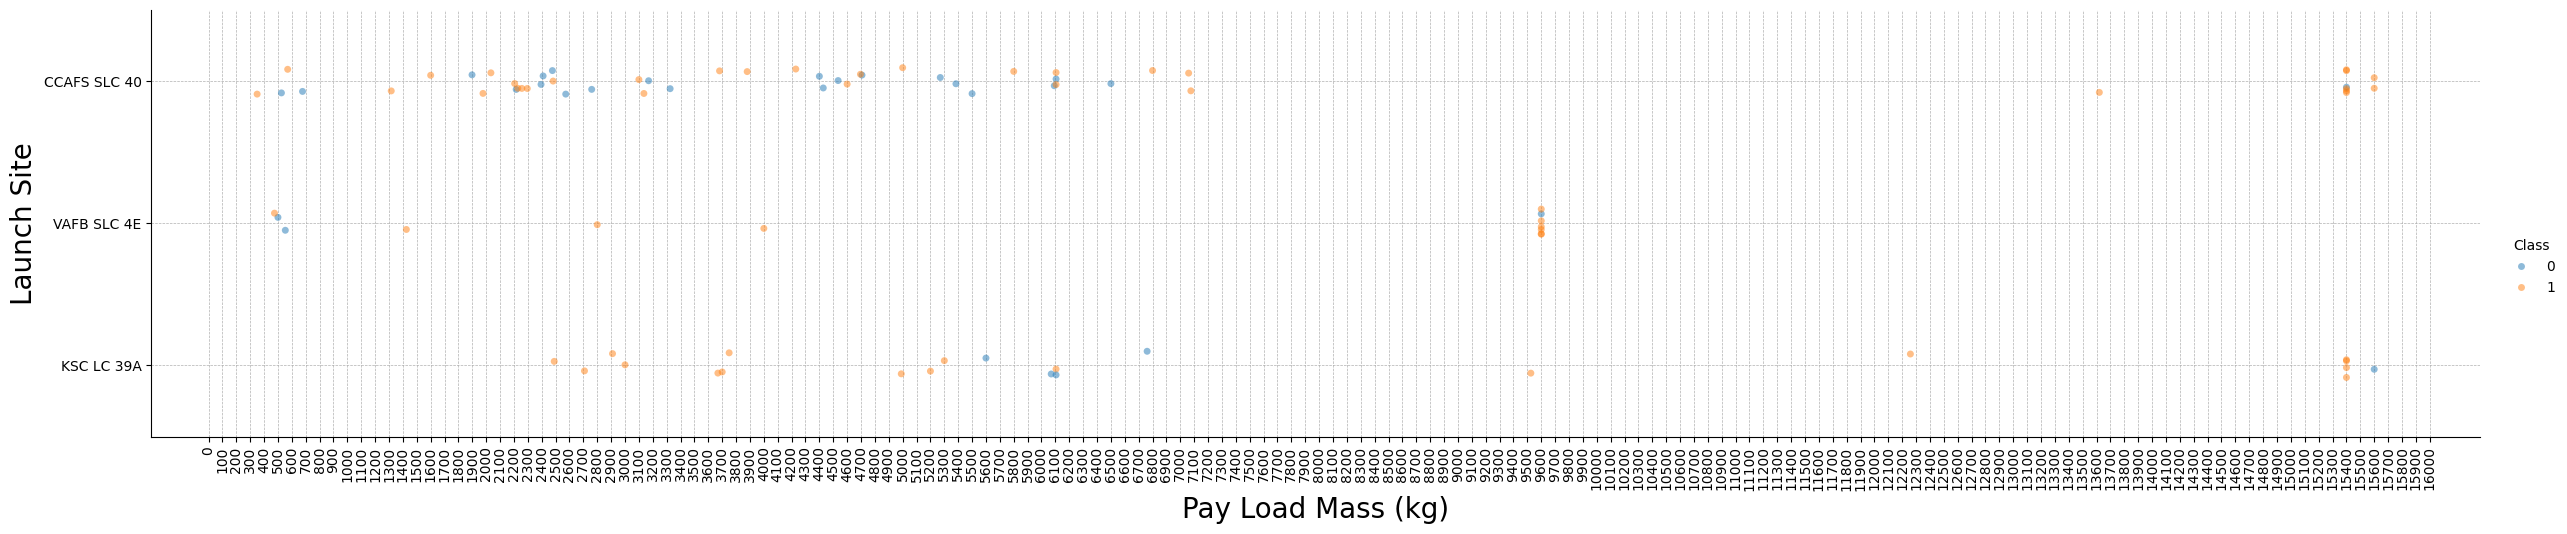

In [ ]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(20,10))
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5, alpha = 0.5)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=np.arange(0, 16001, 100), rotation = 90)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Key Observations

KSC LS-39A:
   - Has the hightst success rate and the second most various payload mass range.

CCAFS SLC-40:
  - Shows the most variation in payload mass, ranging from low to high values.
  - Heavier payloads (e.g., above 10,000 kg) are more likely to success (Class 1).

Anomalies in CCAFS SLC-40 and KSC LC-39A:
    Two anomalies are observed:
  - CCAFS SLC-40: A failure (Class 0) at a payload mass of approximately 15,400 kg.
  - KSC LC-39A: A failure (Class 0) at a payload mass of approximately 15,600 kg.
    These anomalies could indicate technical challenges or unique mission conditions at these payload ranges.
        
VAFB SLC-4E:
  - No rockets were launched with a payload mass greater than 10,000 kg.

Summary
  - Most of the launches with payload mass over 7000 kg were successful.

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


Text(0.5, 1.0, 'Distribution of sucess rate across Orbit')

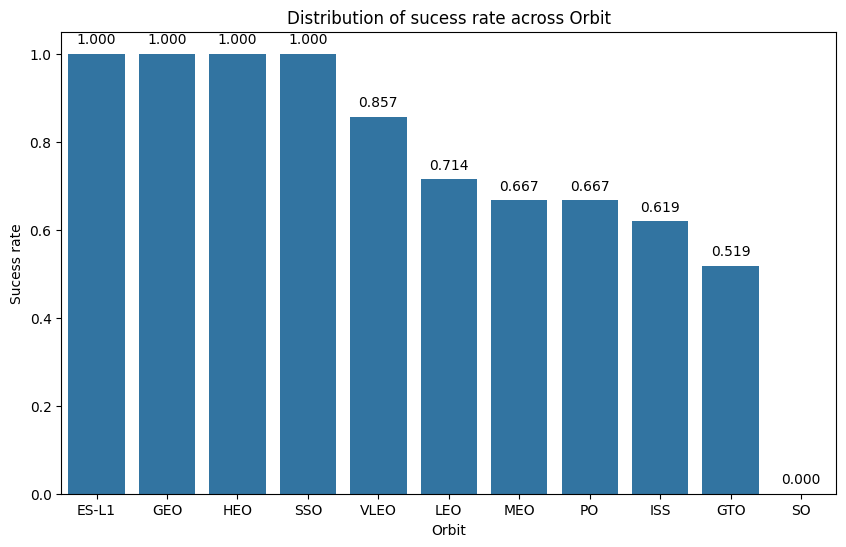

In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column
df_orbit = df.groupby('Orbit')['Class'].mean().reset_index().sort_values(by='Class', ascending=False)
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_orbit, x='Orbit', y='Class')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('Orbit')
plt.ylabel('Sucess rate')
plt.title('Distribution of sucess rate across Orbit')

Analyze the ploted bar chart try to find which orbits have high sucess rate.


Summary
 - High Success Orbits (ES-L1, GEO, HEO, SSO, VLEO): Well-established, reliablel.
 - Moderate Success Orbits (LEO, MEO, PO, ISS): Specialized missions with moderate complexity and risk.
 - Low Success Orbits (GTO): Advanced or experimental missions with higher risk due to complexity or distance.
 - Very Low/Zero Success Orbits (SO): Rarely used or associated with high-risk, experimental missions.
   
Insights
 - The success rate varies significantly across orbits, reflecting differences in mission complexity, technology maturity, and operational challenges.
 - Missions to well-established orbits are more reliable, while experimental or advanced orbits pose higher risks.

In [ ]:
df_sorted = df_orbit.sort_values(by='Class', ascending=False)
df_sorted

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
3,HEO,1.000000
9,SSO,1.000000
10,VLEO,0.857143
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
4,ISS,0.619048
2,GTO,0.518519


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


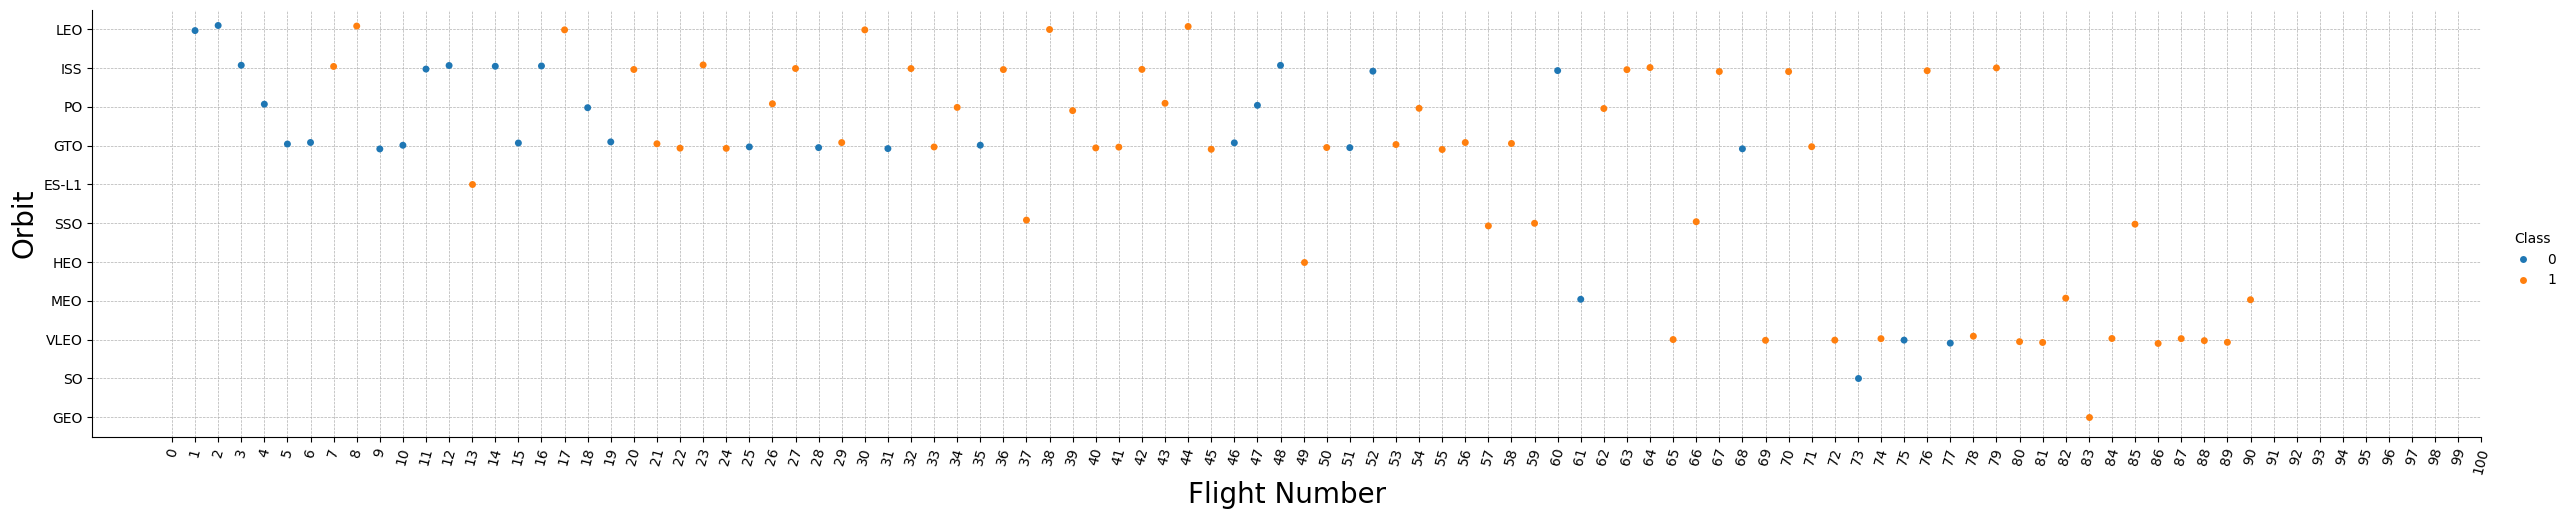

In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=np.arange(0, 101, 1), rotation = 75)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

Key Observations
- High Success Orbits :
   - SSO (100% success rate) has no failures.This indicates that SSO missions are highly reliable and well-optimized.
   - VLEO (85% success rate) shows the most frequency of flights with two failures
   - ES-L1, GEO, and HEO (100% success rate): Each has only one flight, making it difficult to generalize their success rates.
- Anomalies in ISS, PO, MEO, and VLEO:
   - These orbits show failures (Class 0) at specific Flight Numbers (e.g., between 60 and 78). PO at 47. These anomalies could indicate technical challenges, unique mission conditions, or experimental missions.
- SO (0% success rate):
   Only one flight was recorded, and it was a failure (Class 0). This suggests that SO missions may be high-risk or experimental.
- GTO (51% success rate):
   No clear relationship between Flight Number and success rate. Success and failure are distributed across different Flight Numbers.
  
Summary
- General Trend:
  Higher Flight Numbers are more likely to succeed (Class 1), indicating improved reliability and experience over time.
- Exceptions:
  Failures (Class 0) occur in ISS, PO, MEO, and VLEO orbits, particularly between Flight Numbers 60 and 78.
  These anomalies highlight specific challenges or risks associated with these orbits.
- SSO stands out as the most reliable orbit, with no failures and the highest frequency of flights.

### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


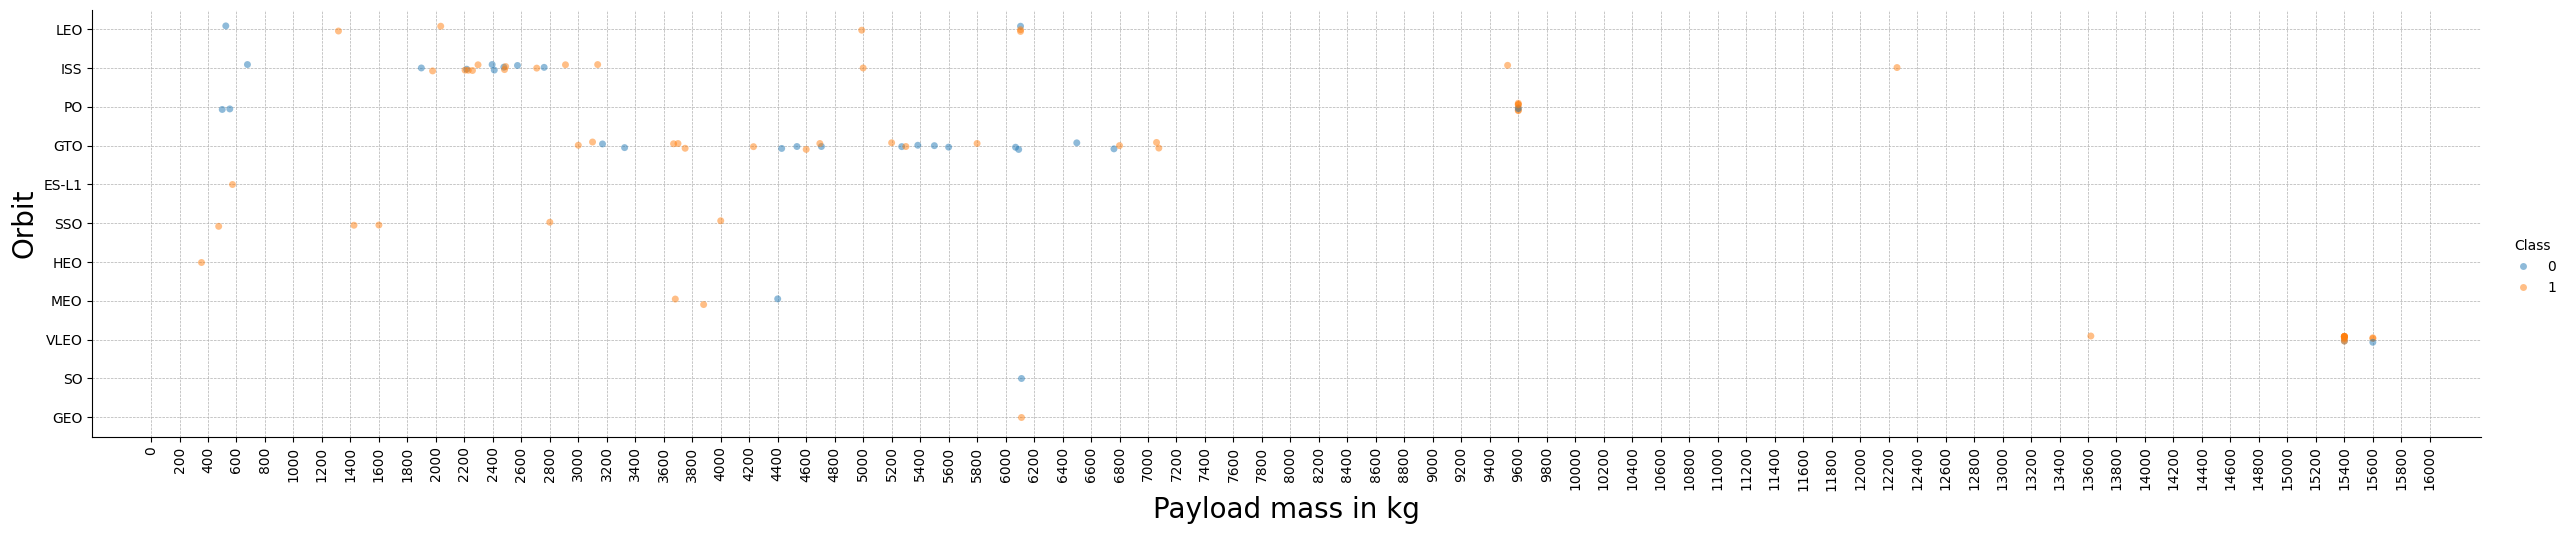

In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data = df, aspect = 5, alpha= 0.5)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=np.arange(0, 16001, 200), rotation = 90)
plt.xlabel("Payload mass in kg",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

Key Observations
 - High Success Orbits:
   - SSO (100% success rate): All payloads are less than 4,000 kg, indicating that lighter payloads in SSO are highly reliable.
   - VLEO (85% success rate): with two failures. All payloads are greater than 10,000 kg, suggesting that heavier payloads in VLEO are generally successful but come with some risk.
   - ES-L1, GEO, and HEO (100% success rate): each has only one recorded flight. (ES-L1 and HEO) Payload masses are less than 600 kg, GEO has a payload mass about 6100 kg. Indicating limited data but high reliability for these orbits.

 - Anomalies in ISS, PO, MEO, and VLEO:
   - ISS: One failure at a payload mass of ~2,780 kg.
   - PO: One failure at a payload mass of ~9,600 kg.
   - MEO: One failure at a payload mass of ~4,400 kg.
   - VLEO: Two failures at payload masses of ~15,400 kg and ~15,600 kg, highlighting challenges with very heavy payloads in this orbit.

 - SO: Only one flight was recorded, with a payload mass of ~6,100 kg, and it was a failure (Class 0). This suggests that SO missions may be high-risk or experimental.

 - GTO: No clear relationship between Flight Number and success rate. Successes and failures are distributed across various payload mass value, indicating variability in mission outcomes.

Summary
 - General Trend: Heavy payloads have a positive influence on VELO, PO, LEO and ISS.
 - Exceptions: Failures (Class 0) occur in ISS, PO, MEO, and VLEO orbits, particularly in VLEO at very high payload masses (~15,400–    15,600 kg). These anomalies highlight specific challenges or risks associated with these orbits and payload ranges.

 - Reliable Orbits:
   - SSO stands out as the most reliable orbit for lighter payloads (under 4,000 kg), with no failures.
   - VLEO is also reliable for heavier payloads (above 10,000 kg), despite two failures at very high masses.

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   
However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
Extract_year(df)
len(year)

#df['Date'].size

90

Text(0.5, 1.0, 'Line plot of the Success rate')

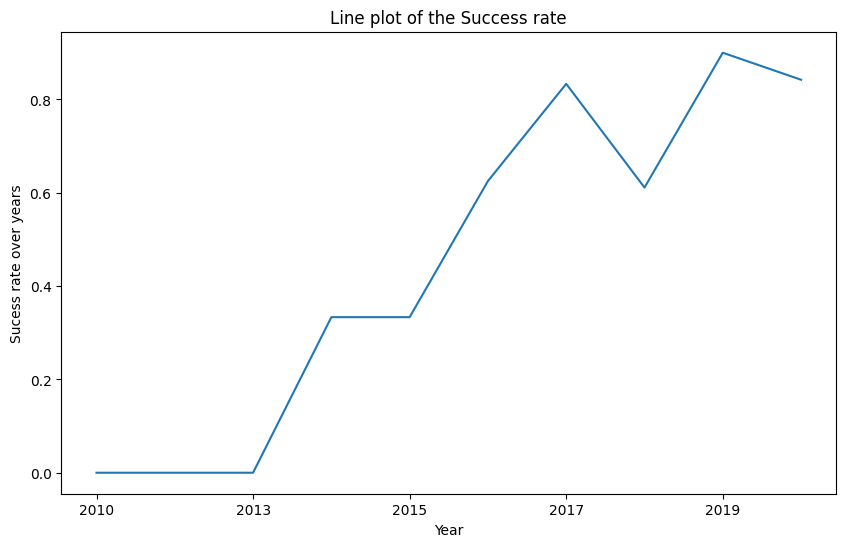

In [ ]:
df['Year'] = year
df_year_suc_rate = df.groupby(['Year'])['Class'].mean()
plt.figure(figsize=(10, 6))
df_year_suc_rate.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sucess rate over years')
plt.title('Line plot of the Success rate')

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
features_one_hot.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056       bool
Serial_B1058       bool
Serial_B1059       bool
Serial_B1060       bool
Serial_B1062       bool
Length: 80, dtype: object

In [ ]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
